# Project: Investigate a Dataset - No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>No-show appointments is a set of data that contains more than 100 thousands midecal appointments which held in Brazil.

>**Scheduled Day** - the day which the patient apointment is set to.

>**Scholarship** - indicates whether the patient is **Subscribed** in the welfare program for Brasilian or not.

>**Gender** - indicates whether the patient is Male (M) or Female (F).

>**Age** - indicates the age of the patient.

>**SMS_received** - indicates whether the patient received a remider before his appointment or not.

>**showing** - indicates whether the patient showed up for the appointment or not.


### Question(s) for Analysis
>The major purpose for this analysis process in to find what is the factors that affect upon the patient and make him show up for his appointment.

>the dependent variable will be the **showing** variable.

>I will use five independent **(Gender, SMS_recevied, Scholarship, Age and Scheduled month)**

>**Questions**

>Which sex is more likely to show up for his/her appointment?

>Does having a remider make patient show up more?

>Is being a Subscribed in welfare program for Brasilian make patient show up more?

>Does the patient age affect his/her showing up?

>What is the month that have the biggest show up rate?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**

>**In this section I will load data and provide some properties for it and then clean the data and make it ready for the analysis**

### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

>**The properties which I will provide here is:**

> The type of each column.

> Whether there are null values.

> Whether there are duplicated values.

In [2]:
# Load data
df = pd.read_csv('KaggleV2-May-2016.csv')

## Printing some data values

In [3]:
#Prforming df.head() function to to show some data rows.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#Prforming df.info() function to get an overview about the data in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#Prforming df.dtypes function shows the data type of each column.
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
#Prforming df.shape function shows number of columns and rows
df.shape

(110527, 14)

In [7]:
#Prforming df.describe() function shows some useful statistical numbers 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# Some outliers are shown after excuting describe function

> As shown age has a negative value. It needs to be modified

>Handcap has a value of 4 in the max value. It needs to be modified

In [8]:
df.Age.mask(df.Age<0, 0, inplace=True)

In [9]:
df.Handcap.mask(df.Handcap>1, 1, inplace=True)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088883,0.098266,0.197246,0.071865,0.030400,0.020276,0.321026
std,2.560949e+14,7.129575e+04,23.110190,0.297675,0.397921,0.258265,0.171686,0.140942,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Looking for Errors in the Data
> I will be performing some codes to check for errors in the data

In [10]:
#Prforming isnull function to check for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [11]:
#Prforming duplicated function to check for duplicated values
df.duplicated().sum()

0


### Data Cleaning
>As showing in the pervious section there are no null values or duplicated values. We have some problems according to the values for each column and we will perform some codes to solve this problems. 

## Droping Some Data Columns
> There are some columns that are not needed in our analysis so I will drop them

> Columns are (PatientId, AppointmentID, AppointmentDay, Neighbourhood, Hipertension, Diabetes, Alcoholism and Handcap)

In [12]:
df.drop(['PatientId', 'AppointmentID', 'AppointmentDay', 'Neighbourhood'], axis = 1, inplace = True)

## Changing ScheduledDay Type
> ScheduledDay is defined as an object. Changing it to datetime to extract the month to use it for the analysis

In [13]:
# convert the ScheduledDay type to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
# extract month and create new column for it
df['sh_month'] = df['ScheduledDay'].dt.month

## Rename Column name
> No-show column can be a problem when performing analysis so I will change it to showing

In [14]:
#using df.rename to change column name
df = df.rename(columns={"No-show":"showing"})

## Changing Columns Values
> Some columns has values that can't be understandable when ploting it in graphs such as:

>Scholarship -- the value of 1 means the patient is a member in the welfare program for Brasilian. I will change it to 'Subscribed' and 'Not Subscribed'

>SMS_recieved -- 0 shows that patient didn't receive a SMS and 1 shows that he/she received. I will change it to 'Not received' and 'Received'

In [15]:
#using df.loc to change the values in the columns.
#for the Scholarship.
df.loc[df["Scholarship"] == 0, "Scholarship"] = 'Not Subscribed'
df.loc[df["Scholarship"] == 1, "Scholarship"] = 'Subscribed'
#for the SMS_recieved.
df.loc[df["SMS_received"] == 0, "SMS_received"] = 'Not received'
df.loc[df["SMS_received"] == 1, "SMS_received"] = 'Received'

## Age Periodes
> Age has so much unique values and this will be messy when analyzing the data. I will perform the cut code to make age periodes to be more comperhensive when plotting graphs

In [16]:
# Age edges to cut the data into groups
Age_edges = [0, 20, 30, 40, 60, 115] #115 is the max value in the age column
# Labels for the four Age Periodes groups
Age_period = ['0-20', '20-30', '30-40', '40-60', '60 and more']
# Create Age Periodes column
df['Age_Periodes'] = pd.cut(df['Age'], Age_edges, labels=Age_period)
df.head()

,Gender,ScheduledDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showing,sh_month,Age_Periodes
0,F,2016-04-29 18:38:08+00:00,62,Not Subscribed,1,0,0,0,Not received,No,4,60 and more
1,M,2016-04-29 16:08:27+00:00,56,Not Subscribed,0,0,0,0,Not received,No,4,40-60
2,F,2016-04-29 16:19:04+00:00,62,Not Subscribed,0,0,0,0,Not received,No,4,60 and more
3,F,2016-04-29 17:29:31+00:00,8,Not Subscribed,0,0,0,0,Not received,No,4,0-20
4,F,2016-04-29 16:07:23+00:00,56,Not Subscribed,1,1,0,0,Not received,No,4,40-60


## Check For All Cleaning Steps
>perform df.head() to check that all the cleaning steps have been worked.

In [17]:
df.head()

,Gender,ScheduledDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showing,sh_month,Age_Periodes
0,F,2016-04-29 18:38:08+00:00,62,Not Subscribed,1,0,0,0,Not received,No,4,60 and more
1,M,2016-04-29 16:08:27+00:00,56,Not Subscribed,0,0,0,0,Not received,No,4,40-60
2,F,2016-04-29 16:19:04+00:00,62,Not Subscribed,0,0,0,0,Not received,No,4,60 and more
3,F,2016-04-29 17:29:31+00:00,8,Not Subscribed,0,0,0,0,Not received,No,4,0-20
4,F,2016-04-29 16:07:23+00:00,56,Not Subscribed,1,1,0,0,Not received,No,4,40-60


<a id='eda'></a>
## Exploratory Data Analysis

>exploring data will give the results of my analysis. using matplotlib and seaborn to plot grahps will give a better understanding on how every variable affect the showing variable. I choosed the most important five variables and will study how they affect the showing rate.

# First Exploring some stastical properties for the dataset

In [18]:
df.describe()

,Age,Hipertension,Diabetes,Alcoholism,Handcap,sh_month
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088883,0.197246,0.071865,0.030400,0.020276,4.823871
std,23.110190,0.397921,0.258265,0.171686,0.140942,0.715801
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,12.000000


>**Distribution of the ages of the patients**

Text(0, 0.5, 'number of patients')

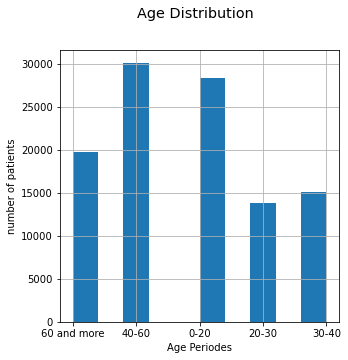

In [19]:
df.Age_Periodes.hist(figsize = (5,5))
plt.suptitle('Age Distribution', x=0.5, y=1, ha='center', fontsize='x-large')
plt.xlabel('Age Periodes')
plt.ylabel('number of patients')

>**The large number of patients are from 0-20 and 40-60**

>**How many people are subscribed for the Brazilian welfare program**

In [20]:
df.Scholarship.value_counts()

Not Subscribed    99666
Subscribed        10861
Name: Scholarship, dtype: int64

>**Number of Subscibed is near to 11K and its 10 % of the total patient**

>**How many people are received a SMS remider**

In [21]:
df.SMS_received.value_counts()

Not received    75045
Received        35482
Name: SMS_received, dtype: int64

>**Number of patient received SMS is 35.5K and its 33 % of the total patient**

### Hist for Columns
> making a historgram for columns give us a better understanding and show how the data is distributed.

Text(0, 0.5, 'number of patients')

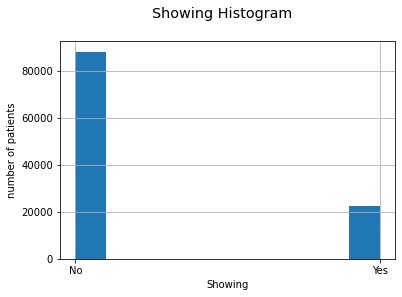

In [22]:
#making hist for all the data
df.showing.hist()
plt.suptitle('Showing Histogram', x=0.5, y=1, ha='center', fontsize='x-large')
plt.xlabel('Showing')
plt.ylabel('number of patients')

>**People who showed up is so much more than thoes who doesn't show up**

# Defining function for analysis

In [23]:
#Using df.loc to convert showing rate to precentage
df.loc[:, 'showing'] = df.loc[:, 'showing'].apply(lambda x: 0 if x=="No" else 1)
#defining plotting function
def create_plot(Column_name):
    df_sms = df.groupby([Column_name, "showing"]).size().reset_index(name="Count")
    my_plot = sns.barplot(x=Column_name, y="Count",hue = "showing", data=df_sms)
    plt.show()

### Research Question 1 (Which sex is more likely to show up for his/her appointment?)

In [24]:
#Precentage of Absent patient
df.groupby('Gender').mean().loc[:, 'showing']

Gender
F    0.203146
M    0.199679
Name: showing, dtype: float64

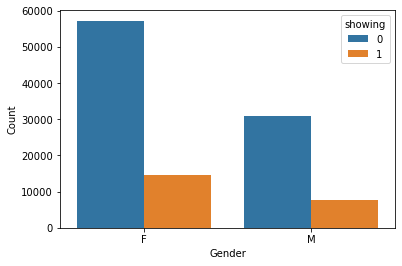

In [25]:
#making groupby for SMS_received and Showing and using matplotlib and seaborn to plot clustered columns graph
create_plot('Gender')

>**Female are more likely to show up for thier appointments**

### Research Question 2  (Does having a remider make patient show up more?)

In [26]:
#Precentage of Absent patient
df.groupby('SMS_received').mean().loc[:, 'showing']

SMS_received
Not received    0.167033
Received        0.275745
Name: showing, dtype: float64

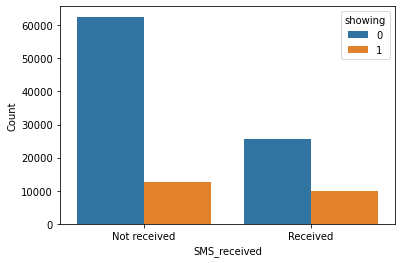

In [27]:
#making groupby for SMS_received and Showing and using matplotlib and seaborn to plot clustered columns graph
create_plot('SMS_received')

>**Receiving a SMS doesn't affect show up rate**

### Research Question 3  (Is being a Subscribed in welfare program for Brasilian make patient show up more?)

In [28]:
#Precentage of Absent patient
df.groupby('Scholarship').mean().loc[:, 'showing']

Scholarship
Not Subscribed    0.198072
Subscribed        0.237363
Name: showing, dtype: float64

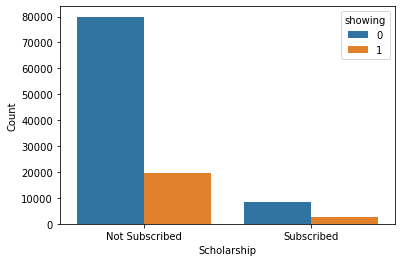

In [29]:
#making groupby for Scholarship and Showing and using matplotlib and seaborn to plot clustered columns graph
create_plot('Scholarship')

>**Subscribing to the Welfare program doesn't affect the show up rate**

### Research Question 4  (Does the patient age affect his/her showing up?)

In [30]:
#Precentage of Absent patient
df.groupby('Age_Periodes').mean().loc[:, 'showing']

Age_Periodes
0-20           0.228090
20-30          0.246245
30-40          0.214722
40-60          0.185865
60 and more    0.152110
Name: showing, dtype: float64

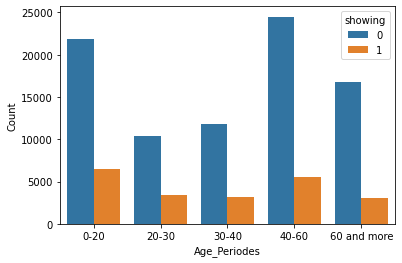

In [32]:
#making groupby for Age Periodes and Showing and using matplotlib and seaborn to plot clustered columns graph
create_plot('Age_Periodes')

>**People with age of 40-60 and 0-20 is more commited to show up on thier appointments**

>We can predict the cause of this finding that people under 20 showed up more because their parents is in charge to make them commit for the scheduled appointment.

>Also people from 40-60 focus on their health more than anything else.

### Research Question 5  (What is the month that have the biggest show up rate?)

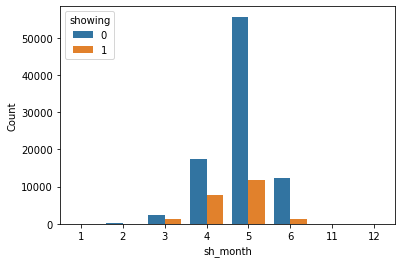

In [33]:
#making groupby for Age Periodes and Showing and using matplotlib and seaborn to plot clustered columns graph
create_plot('sh_month')

>**This plot shows that the most number of showed up patients has occured in May**

<a id='conclusions'></a>
## Conclusions

>**At the end of the report I can clearfy that Age and Gender of the patient are the most effective factors that made patient show up for their scheduled appointment.**

>**Some columns value had outliers such as the Age which had negative values. This outliers doesn't affect the analysis.**

>**This analysis can be performed on the total population and it's not just for the sample giving.**

>**Missing the other months data affect my analysis and I couldn't find some special that increased the show up rate in the may month. Missing data related to his/her location. this location data may help on showing the reason some people doesn't show up.**

>**the data included in the dataset relate to each other as correlation not a causation.**

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])